### Practical 2: Modelling Practical

Main aim is to do some predictive modelling on health data and design and write up a computational experiment. You will investigate solutions to question(s) of your choosing based around predictive modelling of a specific medial dataset, doing computational experiments to answer questions and write up a report on what you did and why you did it that way, along with the outputs of your experiments. 

Dataset: The Breast Cancer Wisconsin Dataset

a. Decide on a question, or series of questions, around using the above dataset, that you can
answer using predictive (machine learning) models (and the time you have).

How does model diversity within a Voting Classifier affect classification performance in breast cancer prediction?

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

After importing the data, we look at the features, its shape.

In [3]:
data = pd.concat([X, y], axis=1)
print(data.head(2))


   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38       122.8  1001.0      0.11840       0.27760   
1    20.57     17.77       132.9  1326.0      0.08474       0.07864   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0       184.6  2019.0       0.1622        0.6656      0.7119           0.2654   
1       158.8  1956.0       0.1238        0.1866      0.2416           0.1860   

   symmetry3  fractal_dimension3  Diagnosis  
0     0.4601             0.11890          M  
1     0.2750             0.08902          M  

[2 rows x 31 columns]


In [4]:
print(pd.DataFrame(X).columns)


Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


In [5]:
print("Shape of dataset:", data.shape)
print("Indexes of dataset:", data.index)


Shape of dataset: (569, 31)
Indexes of dataset: RangeIndex(start=0, stop=569, step=1)


In [6]:
print(data.iloc[:, :2].head())

   radius1  texture1
0    17.99     10.38
1    20.57     17.77
2    19.69     21.25
3    11.42     20.38
4    20.29     14.34


We continue with the data by checking the distribution and the statistics of the data. By observing the outputs, many features have large varying scales.

In [7]:
print(data.describe())


          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         

In [8]:
print(data.isnull().any())


radius1               False
texture1              False
perimeter1            False
area1                 False
smoothness1           False
compactness1          False
concavity1            False
concave_points1       False
symmetry1             False
fractal_dimension1    False
radius2               False
texture2              False
perimeter2            False
area2                 False
smoothness2           False
compactness2          False
concavity2            False
concave_points2       False
symmetry2             False
fractal_dimension2    False
radius3               False
texture3              False
perimeter3            False
area3                 False
smoothness3           False
compactness3          False
concavity3            False
concave_points3       False
symmetry3             False
fractal_dimension3    False
Diagnosis             False
dtype: bool


The data has no missing values.
Now we continue to check for the number of malignant and benign cases. 

No. of malignant cases:  357
No. of benign cases:  212


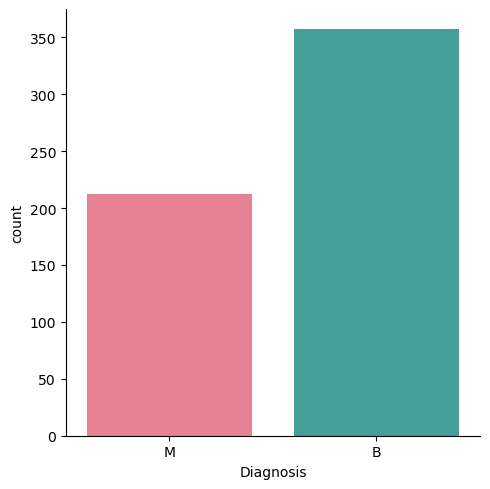

In [9]:
M,B = data['Diagnosis'].value_counts()
print('No. of malignant cases: ', M)
print('No. of benign cases: ', B)
sns.catplot(x='Diagnosis', kind='count', data=data, palette="husl")

We separate the dataframes for malignant and benign cases (used for plotting)

In [10]:
M = data.loc[data['Diagnosis']=='M', :]
M.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [11]:
B = data.loc[data['Diagnosis'] == 'B', :]
B.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [12]:
M = data[data['Diagnosis'] == 'M']
B = data[data['Diagnosis'] == 'B']



#### Plots

Using Kernel Density Estimation (KDE) plots to check the distribution of malignant and benign cases for various features. 

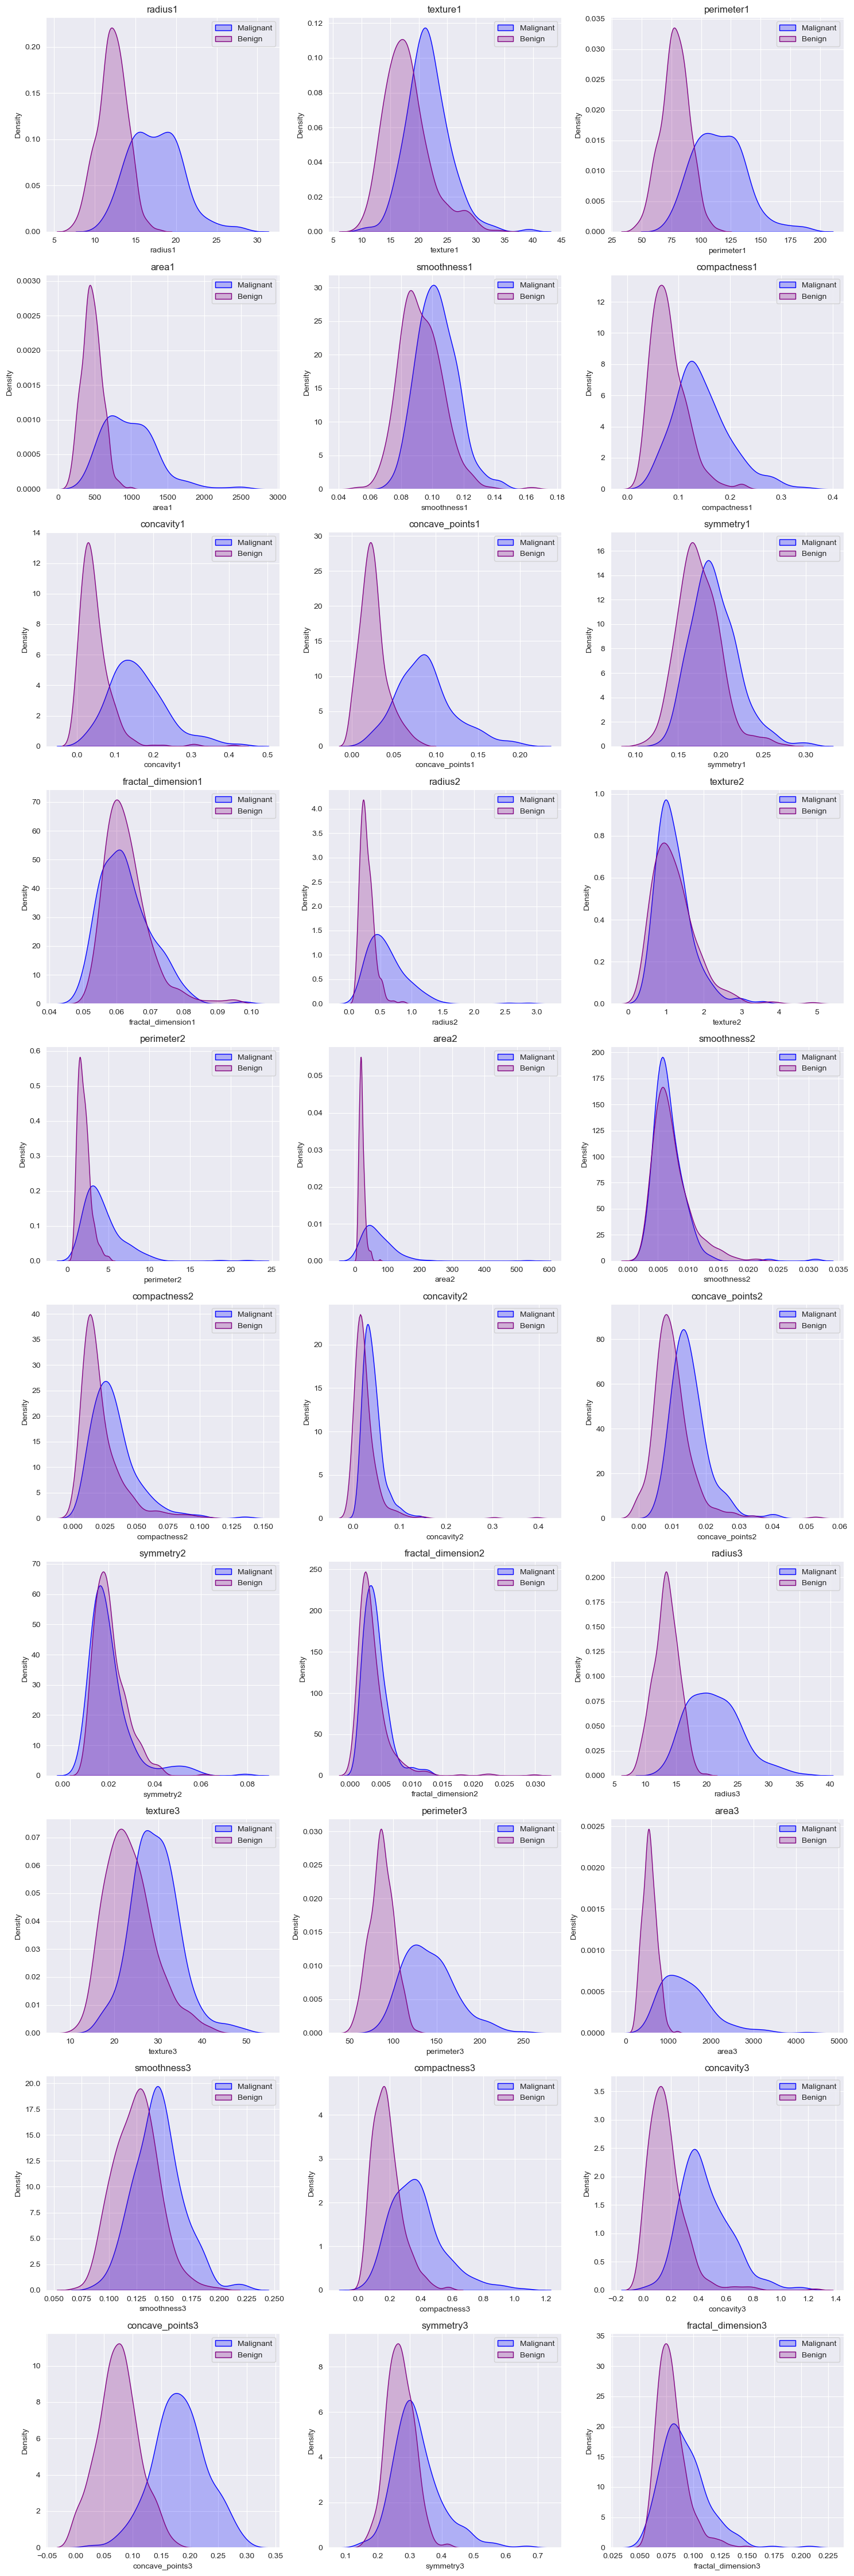

In [13]:
plt.figure(figsize=(15, 45))
sns.set_style('darkgrid')
plt.subplots_adjust(hspace=0.4, wspace=0.2)

i = 0
for col in X.columns:
    i += 1
    plt.subplot(10, 3, i)
    M_col = pd.to_numeric(M[col], errors='coerce').dropna()
    B_col = pd.to_numeric(B[col], errors='coerce').dropna()
    if not M_col.empty and not B_col.empty:
        sns.kdeplot(M_col, color='blue', label='Malignant', fill=True)
        sns.kdeplot(B_col, color='purple', label='Benign', fill=True)
        plt.legend(loc='upper right')
        plt.title(col)
    else:
        plt.text(0.5, 0.5, "No data", ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


The KDE plots show the distribution of various tumor characteristics for malignant and benign cases. The features such as the radius, perimeter, area, concavity and concave points exhibit clear separation, with malignant tumors generally having higher values. This means that larger tumors and more irregular tumors have higher chances of malignancy. Attributes such as smoothness, summetry and fractal dimension show substatial overlap, which suggests these will not be effective independent predictors for malignancy. Certain attributes perimeter3, area3 and concavity3 have right-skewed distribution, which point to the prevalence of a few tumors with values at the extremes. These disparities underscore the necessity of feature scaling prior to implementing machine learning models.

Another way to check these differences can be by using boxplots.Next, we explore if and how these features are corrleted to one another. This is done using heatmap.

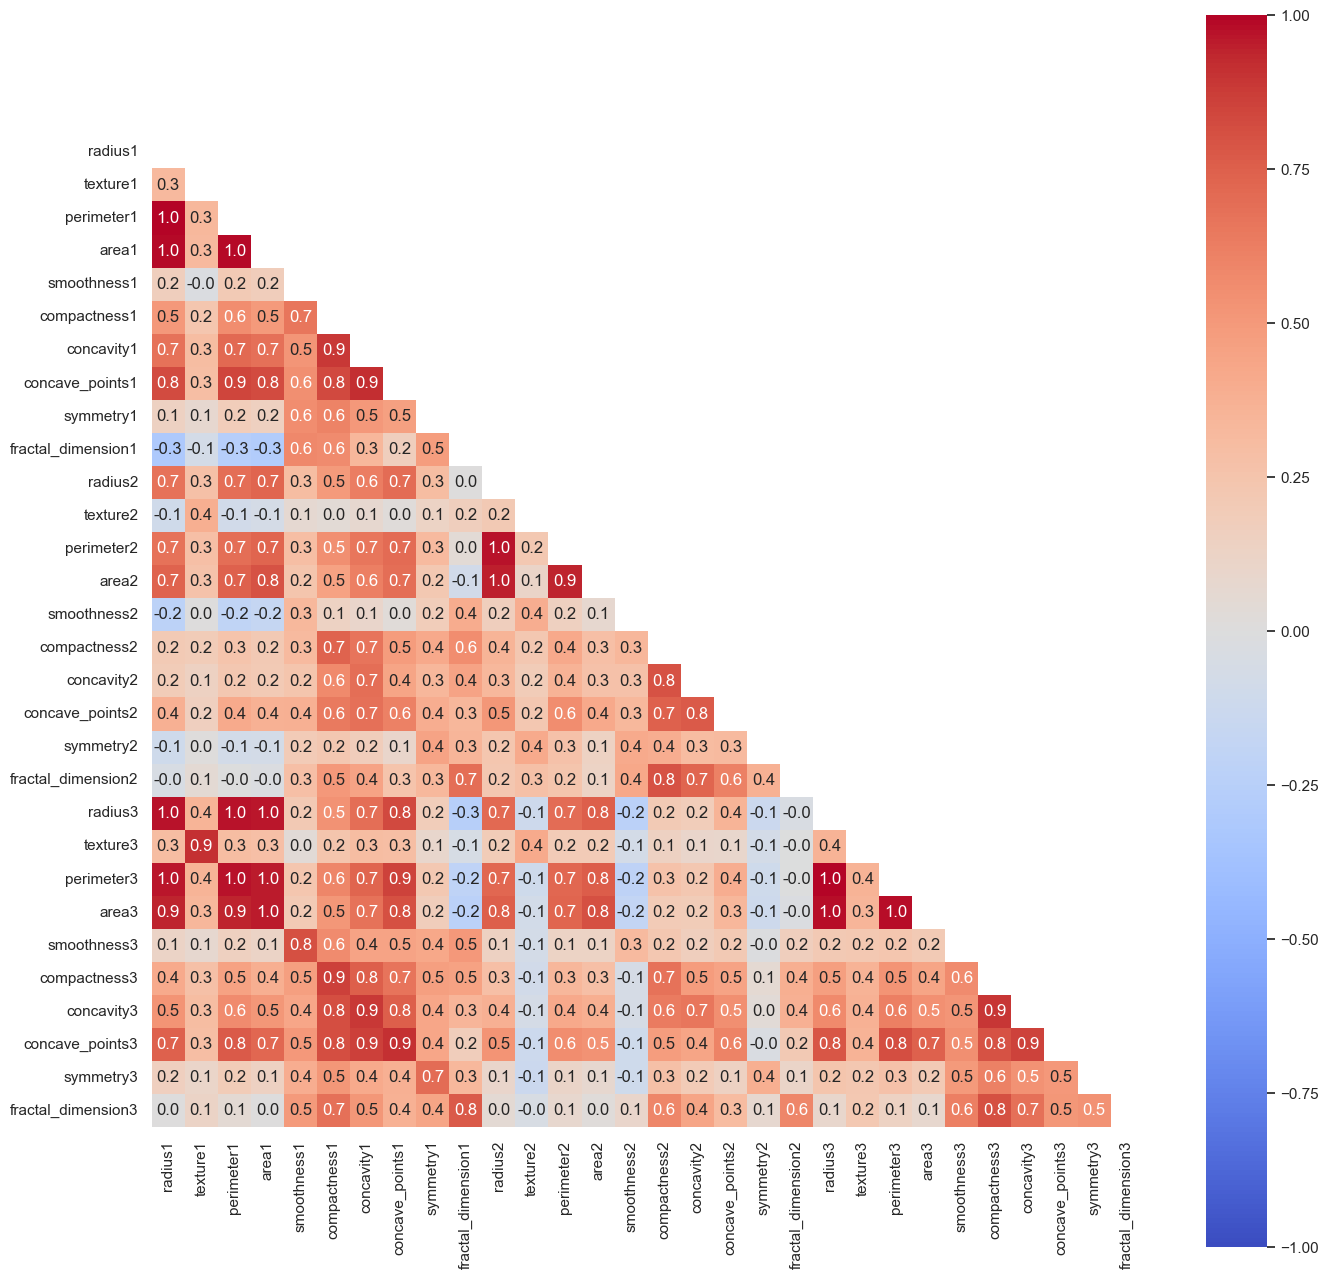

In [14]:
numeric_data = data.drop(columns=['Diagnosis'])
corr = numeric_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, vmin=-1, vmax=1, fmt=".1f", annot=True, cmap="coolwarm", mask=mask, square=True)
plt.show()


The colour intensity represents the strength and the direction of relationships between numerical variables. Strong positive correlations (deep red) indicate that as one feature increases, another also tend to inrease. Blue shows strong negative relationships: there is an inverse relationship. Diagonal values are all 1 since each variable is perfectly correlated with itself. Variables like 'radius1', 'perimeter1' and 'area1' are highly positively correlated with each other, impying they are capturing the same sort of information, size or shape metrics. Conversely, 'fractal_dimension' has weaker or even slightly negative correlation with certain variables, which means it has a different pattern of variation. The fact that there are grouped variables with suffixes (`1`, `2`, `3`) indicates that they are different statistical summaries (e.g., mean, standard deviation, or worst values) of the medical image features. 

To avoid high variance due to correlated features, we drop ropping area1, perimeter1, area2, perimeter2, area3, and perimeter3, while keeping radius1, radius2, and radius3 to avoid redundancy

In [15]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data = data.drop(['area1', 'perimeter1', 'radius3', 'area3', 'perimeter3', 
                  'texture3', 'concavity1', 'perimeter2', 'area2'], axis=1)
print(data.shape)


(569, 22)


#### Building Model

We start by splitting the data:

In [16]:
y = data['Diagnosis'].values
x = data.drop(['Diagnosis'], axis=1).values
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=8)

Next we are performing the Principal Component Analysis (PCA) to determine the optimal number of components for dimensionality reduction. This aids in dimensionality reduction which can otherwise lead to high variance. Before applying PCA, the features must be standardized so that all the variables have te same contribution, since high-variance features would dominate the analysis. We do this using 'StandardScaler()'. Instead of arbitrarily deciding on the number of components we determine it from the cumulative explained variance. By plotting the cumulative explained variance vs number of components, we notice that 10 components capture most of the variance (around 95%). Thus, we continue with PCA with 10 components to reduce dimensionality.

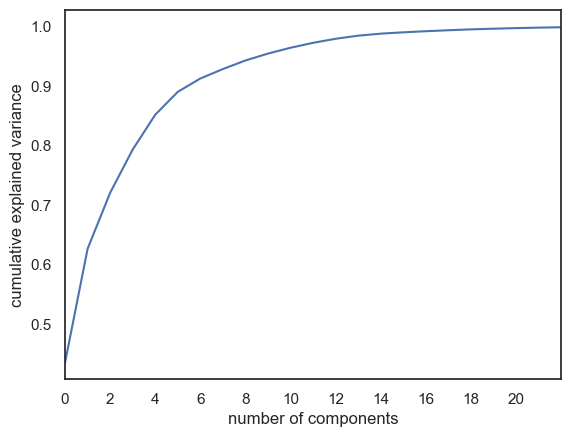

In [17]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
pca = PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0, 22)  
plt.xticks(np.arange(0, 22, 2))  
plt.show() 


In [18]:
pca = PCA(n_components=10)
pca.fit(X_train_std)
X_train_pca=pca.transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
print(X_train_pca.shape)
print(X_test_pca.shape)

(398, 10)
(171, 10)


#### Logistic Regression 

In [19]:
logreg = LogisticRegression(random_state = 1)
score = np.mean(cross_val_score(logreg, X_train_pca, y_train, scoring = 'accuracy'))
p_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))

Accuracy: 97.99%
Precision : 98.69%
Recall score: 95.86%


We achieve a high accuracy of 97.99% with a strong precision of 98.69% and a recall rate of 95.86%, ensuring reliable classification performance.

#### KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()
scores = np.mean(cross_val_score(knn, X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(knn, X_train_pca, y_train, scoring = 'precision'))
r_scores = np.mean(cross_val_score(knn, X_train_pca, y_train, scoring = 'recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))
X1_train,X1_test,y1_train,y1_test= train_test_split(X_train_pca, y_train,test_size=0.3,random_state=21)
knn.fit(X1_train,y1_train)
y_pred=knn.predict(X1_test)
con=confusion_matrix(y1_test,y_pred)
print('Confusion matrix:')
print(con)

Accuracy: 97.99%
Precision : 97.85%
Recall score: 92.46%
Confusion matrix:
[[72  0]
 [ 3 45]]


Evaluating our model using KNeighborsClassifier and achieved a high accuracy of 97.99%. Precision and recall are also strong, at 97.85% and 92.46%, respectively. The confusion matrix shows 72 true negatives, 45 true positives, and only 3 false negatives, indicating that the model performs well in correctly classifying cases. While the confusion matrix provides insight into true and false classifications, for the rest of the analysis, will focus more on precision and recall scores to assess the model's effectiveness.

In [21]:
knn=KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
knn_cv.fit( X_train_pca, y_train)
print(knn_cv.best_params_)

{'n_neighbors': 5}


While performing hyperparameter tuning using GridSearchCV to figure out the best parameters, for knn the nuber of neighbors comes out to be 5

Next, the analysis goes further while checking on KNeighborsClassifier with hyperparameters tuning perform on new test sets and compare its performance with knn. 

In [22]:
knn_cv=KNeighborsClassifier(n_neighbors= 9)
score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='precision'))
r_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn_cv: %s" % '{:.2%}'.format(score_knn_cv))
print ('Precision for knn_cv: %s' %'{:.2%}' .format(p_score_knn_cv))
print ('Recall score for knn_cv: %s' % '{:.2%}'.format(r_score_knn_cv))

score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn= np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='precision'))
r_score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn: %s" % '{:.2%}'.format(score_knn))
print ('Precision for knn: %s' %'{:.2%}' .format(p_score_knn))
print ('Recall score for knn: %s' % '{:.2%}'.format(r_score_knn))

Accuracy for knn_cv: 92.99%
Precision for knn_cv: 98.46%
Recall score for knn_cv: 83.41%
Accuracy for knn: 94.72%
Precision for knn: 98.46%
Recall score for knn: 87.80%
